In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data cleaning

## Unzipping data set

In [2]:
!unzip /content/drive/MyDrive/GESTION/datos_octubre_hoy_filter.zip

Archive:  /content/drive/MyDrive/GESTION/datos_octubre_hoy_filter.zip
replace datos_octubre_hoy_filter.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


##  Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## Complementary Libraries
import json
import seaborn as sns


## Loading Data

In [4]:
df = pd.read_csv("/content/drive/MyDrive/GESTION/datos_octubre_hoy_filter.zip")

## Descriptive analysis

### Initial Analysis

In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,event_date,event_timestamp,event_name,event_params,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,...,user_ltv,device,geo,app_info,traffic_source,stream_id,platform,event_dimensions,ecommerce,items
0,182345,0,20211231,2022-01-01 04:28:45.594000,session_start,"[{'key': 'engaged_session_event', 'value': {'s...",2021-12-28 03:05:03.454000128,NaN,187,128419,...,NaN,"{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'country': 'Colombia...","{'id': 'com.brilliant.brilliantapp', 'version'...","{'name': '(direct)', 'medium': '(none)', 'sour...",1049018279,IOS,NaN,NaN,[]
1,182346,1,20211231,2022-01-01 04:28:45.774001,screen_view,"[{'key': 'engaged_session_event', 'value': {'s...",2021-12-28 03:05:03.572001024,NaN,187,128419,...,NaN,"{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'country': 'Colombia...","{'id': 'com.brilliant.brilliantapp', 'version'...","{'name': '(direct)', 'medium': '(none)', 'sour...",1049018279,IOS,NaN,NaN,[]
2,182347,2,20211231,2022-01-01 04:28:46.279000,user_login,"[{'key': 'firebase_screen_class', 'value': {'s...",2021-12-28 03:05:04.255000064,NaN,188,128420,...,NaN,"{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'country': 'Colombia...","{'id': 'com.brilliant.brilliantapp', 'version'...","{'name': '(direct)', 'medium': '(none)', 'sour...",1049018279,IOS,NaN,NaN,[]
3,182348,3,20211231,2022-01-01 04:29:04.189000,user_engagement,"[{'key': 'engagement_time_msec', 'value': {'st...",2021-12-28 03:05:22.624999936,NaN,189,258032,...,NaN,"{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'country': 'Colombia...","{'id': 'com.brilliant.brilliantapp', 'version'...","{'name': '(direct)', 'medium': '(none)', 'sour...",1049018279,IOS,NaN,NaN,[]
4,182356,11,20211231,2022-01-01 02:58:14.927000,session_start,"[{'key': 'session_engaged', 'value': {'string_...",2021-12-27 04:20:24.020000000,NaN,28,809294,...,NaN,"{'category': 'mobile', 'mobile_brand_name': 'H...","{'continent': 'Americas', 'country': 'Colombia...","{'id': 'com.brilliant.brilliantapp', 'version'...","{'name': None, 'medium': 'organic', 'source': ...",1049018278,ANDROID,NaN,NaN,[]


In [6]:
## Dropping unnamed columns
df = df.drop(columns=["Unnamed: 0.1", "Unnamed: 0"])

In [7]:
##  Columns
df.columns.to_list()

['event_date',
 'event_timestamp',
 'event_name',
 'event_params',
 'event_previous_timestamp',
 'event_value_in_usd',
 'event_bundle_sequence_id',
 'event_server_timestamp_offset',
 'user_id',
 'user_pseudo_id',
 'user_properties',
 'user_first_touch_timestamp',
 'user_ltv',
 'device',
 'geo',
 'app_info',
 'traffic_source',
 'stream_id',
 'platform',
 'event_dimensions',
 'ecommerce',
 'items']

In [8]:
# Shape of dataframe
df.shape

(305386, 22)

In [9]:
# Dataframe types
df.dtypes

event_date                         int64
event_timestamp                   object
event_name                        object
event_params                      object
event_previous_timestamp          object
event_value_in_usd               float64
event_bundle_sequence_id           int64
event_server_timestamp_offset      int64
user_id                           object
user_pseudo_id                    object
user_properties                   object
user_first_touch_timestamp        object
user_ltv                         float64
device                            object
geo                               object
app_info                          object
traffic_source                    object
stream_id                          int64
platform                          object
event_dimensions                 float64
ecommerce                        float64
items                             object
dtype: object

In [10]:
# Initial description of dataframe only numeric columns
df.describe()

,event_date,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_ltv,stream_id,event_dimensions,ecommerce
count,3.053860e+05,0.0,305386.000000,3.053860e+05,0.0,3.053860e+05,0.0,0.0
mean,2.022034e+07,NaN,163.988257,2.469495e+07,NaN,2.040928e+09,NaN,NaN
std,2.414594e+02,NaN,560.817478,1.335686e+09,NaN,4.783518e+08,NaN,NaN
min,2.021123e+07,NaN,1.000000,0.000000e+00,NaN,1.049018e+09,NaN,NaN
25%,2.022022e+07,NaN,4.000000,2.425720e+05,NaN,1.871304e+09,NaN,NaN
50%,2.022033e+07,NaN,18.000000,5.885675e+05,NaN,1.875860e+09,NaN,NaN
75%,2.022043e+07,NaN,102.000000,1.313897e+06,NaN,2.127392e+09,NaN,NaN
max,2.022060e+07,NaN,5756.000000,1.728004e+11,NaN,3.479325e+09,NaN,NaN


In [11]:
## Count Nulls
df.isnull().sum()

event_date                            0
event_timestamp                       0
event_name                            0
event_params                          0
event_previous_timestamp              0
event_value_in_usd               305386
event_bundle_sequence_id              0
event_server_timestamp_offset         0
user_id                          108983
user_pseudo_id                        0
user_properties                       0
user_first_touch_timestamp            0
user_ltv                         305386
device                                0
geo                                   0
app_info                              0
traffic_source                    25438
stream_id                             0
platform                              0
event_dimensions                 305386
ecommerce                        305386
items                                 0
dtype: int64

#### Cleaning firsts nulls detected

In [12]:
# Columns with 100% null are take out
columns_with_null = ["event_value_in_usd", "user_ltv", "event_dimensions", "ecommerce"]

In [13]:
# Save dataframe with columns not null
df = df.drop(columns=columns_with_null)

In [14]:
df.head()

,event_date,event_timestamp,event_name,event_params,event_previous_timestamp,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,user_properties,user_first_touch_timestamp,device,geo,app_info,traffic_source,stream_id,platform,items
0,20211231,2022-01-01 04:28:45.594000,session_start,"[{'key': 'engaged_session_event', 'value': {'s...",2021-12-28 03:05:03.454000128,187,128419,49ab6445-53a6-4b43-91ed-2c9ec6bbd0d4,87FC257992F041E78061F8F85564EF17,"[{'key': 'community', 'value': {'string_value'...",2021-11-10 15:57:01.778,"{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'country': 'Colombia...","{'id': 'com.brilliant.brilliantapp', 'version'...","{'name': '(direct)', 'medium': '(none)', 'sour...",1049018279,IOS,[]
1,20211231,2022-01-01 04:28:45.774001,screen_view,"[{'key': 'engaged_session_event', 'value': {'s...",2021-12-28 03:05:03.572001024,187,128419,49ab6445-53a6-4b43-91ed-2c9ec6bbd0d4,87FC257992F041E78061F8F85564EF17,"[{'key': 'community', 'value': {'string_value'...",2021-11-10 15:57:01.778,"{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'country': 'Colombia...","{'id': 'com.brilliant.brilliantapp', 'version'...","{'name': '(direct)', 'medium': '(none)', 'sour...",1049018279,IOS,[]
2,20211231,2022-01-01 04:28:46.279000,user_login,"[{'key': 'firebase_screen_class', 'value': {'s...",2021-12-28 03:05:04.255000064,188,128420,49ab6445-53a6-4b43-91ed-2c9ec6bbd0d4,87FC257992F041E78061F8F85564EF17,"[{'key': 'first_open_time', 'value': {'string_...",2021-11-10 15:57:01.778,"{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'country': 'Colombia...","{'id': 'com.brilliant.brilliantapp', 'version'...","{'name': '(direct)', 'medium': '(none)', 'sour...",1049018279,IOS,[]
3,20211231,2022-01-01 04:29:04.189000,user_engagement,"[{'key': 'engagement_time_msec', 'value': {'st...",2021-12-28 03:05:22.624999936,189,258032,49ab6445-53a6-4b43-91ed-2c9ec6bbd0d4,87FC257992F041E78061F8F85564EF17,"[{'key': 'user_id', 'value': {'string_value': ...",2021-11-10 15:57:01.778,"{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'country': 'Colombia...","{'id': 'com.brilliant.brilliantapp', 'version'...","{'name': '(direct)', 'medium': '(none)', 'sour...",1049018279,IOS,[]
4,20211231,2022-01-01 02:58:14.927000,session_start,"[{'key': 'session_engaged', 'value': {'string_...",2021-12-27 04:20:24.020000000,28,809294,1717e0ff-324e-4500-a6bc-aa464e701ea9,13b425237fd1622c86df2a2c88ff5221,"[{'key': 'community', 'value': {'string_value'...",2021-12-07 01:13:08.739,"{'category': 'mobile', 'mobile_brand_name': 'H...","{'continent': 'Americas', 'country': 'Colombia...","{'id': 'com.brilliant.brilliantapp', 'version'...","{'name': None, 'medium': 'organic', 'source': ...",1049018278,ANDROID,[]


#### Columns filtered by Business needs

In [15]:
final_columns = ["event_date", "event_timestamp", "event_name", "event_previous_timestamp","user_pseudo_id", "user_first_touch_timestamp","device", "geo","app_info", "platform"]

In [16]:
# Dataframe filtered by columns used for business needs
df = df[final_columns]

### Second Analysis

#### Transformations

In [17]:
## Convert event_date from int 20110913 to date 2011-09-13
df["event_date"] = df["event_date"].apply(lambda x: str(x)[:4]+'-'+str(x)[4:6]+ '-'+str(x)[6:])

In [18]:
## From event_timestamp extract information of year-month-day
# Create 2 new columns event_year and event_month
df["event_timestamp"] = df["event_timestamp"].apply(lambda x: x[:10])
df["event_year"] = df["event_timestamp"].apply(lambda x: x[:4])
df["event_month"] = df["event_timestamp"].apply(lambda x: x[5:7])


In [19]:
## Transform column device from string to dict
df["device_transform"] = df["device"].apply(lambda x: json.loads(
                                                            x.replace("\n","").replace("} {", "}, {").replace("'",'"').replace("None", "null")
                                                            )
                                       )

In [20]:
## Create 2 columns device_type e.g. mobile, pc, tablet,
## brand apple, xiaomi, google, samsung
df["device_type"] = df["device_transform"].apply(lambda x: x["category"]
                                                 )

df["brand"] = df["device_transform"].apply(lambda x: x["mobile_brand_name"]
                                                 )

In [21]:
## extract georeference information e.g. america, europe, asia
df["geo_transform"] = df["geo"].apply(lambda x: json.loads(
                                                x.replace("\n","").replace("} {", "}, {").replace("'",'"').replace("None", "null").replace("\'", '"').replace('d"Azur',"d Azur")
                                                )
                                       )


In [22]:
## extract georeference information e.g.continent, region, city
df["continent"] = df["geo_transform"].apply(lambda x: x["continent"].lower())
df["country"] = df["geo_transform"].apply(lambda x: x["country"].lower())
df["region"] = df["geo_transform"].apply(lambda x: x["region"].lower())
df["city"] = df["geo_transform"].apply(lambda x: x["city"].lower())
df["sub_continent"] = df["geo_transform"].apply(lambda x: x["sub_continent"].lower())

In [23]:
df["app"] = df["app_info"].apply(lambda x: json.loads(
                                                x.replace("\n","").replace("} {", "}, {").replace("'",'"').replace("None", "null").replace("\'", '"')
                                                )["id"].split(".")[1][:2]
                                       )

#### Filter by final columns

In [24]:
df.head()

,event_date,event_timestamp,event_name,event_previous_timestamp,user_pseudo_id,user_first_touch_timestamp,device,geo,app_info,platform,...,device_transform,device_type,brand,geo_transform,continent,country,region,city,sub_continent,app
0,2021-12-31,2022-01-01,session_start,2021-12-28 03:05:03.454000128,87FC257992F041E78061F8F85564EF17,2021-11-10 15:57:01.778,"{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'country': 'Colombia...","{'id': 'com.brilliant.brilliantapp', 'version'...",IOS,...,"{'category': 'mobile', 'mobile_brand_name': 'A...",mobile,Apple,"{'continent': 'Americas', 'country': 'Colombia...",americas,colombia,bogota,bogota,south america,br
1,2021-12-31,2022-01-01,screen_view,2021-12-28 03:05:03.572001024,87FC257992F041E78061F8F85564EF17,2021-11-10 15:57:01.778,"{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'country': 'Colombia...","{'id': 'com.brilliant.brilliantapp', 'version'...",IOS,...,"{'category': 'mobile', 'mobile_brand_name': 'A...",mobile,Apple,"{'continent': 'Americas', 'country': 'Colombia...",americas,colombia,bogota,bogota,south america,br
2,2021-12-31,2022-01-01,user_login,2021-12-28 03:05:04.255000064,87FC257992F041E78061F8F85564EF17,2021-11-10 15:57:01.778,"{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'country': 'Colombia...","{'id': 'com.brilliant.brilliantapp', 'version'...",IOS,...,"{'category': 'mobile', 'mobile_brand_name': 'A...",mobile,Apple,"{'continent': 'Americas', 'country': 'Colombia...",americas,colombia,bogota,bogota,south america,br
3,2021-12-31,2022-01-01,user_engagement,2021-12-28 03:05:22.624999936,87FC257992F041E78061F8F85564EF17,2021-11-10 15:57:01.778,"{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'country': 'Colombia...","{'id': 'com.brilliant.brilliantapp', 'version'...",IOS,...,"{'category': 'mobile', 'mobile_brand_name': 'A...",mobile,Apple,"{'continent': 'Americas', 'country': 'Colombia...",americas,colombia,bogota,bogota,south america,br
4,2021-12-31,2022-01-01,session_start,2021-12-27 04:20:24.020000000,13b425237fd1622c86df2a2c88ff5221,2021-12-07 01:13:08.739,"{'category': 'mobile', 'mobile_brand_name': 'H...","{'continent': 'Americas', 'country': 'Colombia...","{'id': 'com.brilliant.brilliantapp', 'version'...",ANDROID,...,"{'category': 'mobile', 'mobile_brand_name': 'H...",mobile,Huawei,"{'continent': 'Americas', 'country': 'Colombia...",americas,colombia,bogota,bogota,south america,br


In [25]:
df.columns

Index(['event_date', 'event_timestamp', 'event_name',
       'event_previous_timestamp', 'user_pseudo_id',
       'user_first_touch_timestamp', 'device', 'geo', 'app_info', 'platform',
       'event_year', 'event_month', 'device_transform', 'device_type', 'brand',
       'geo_transform', 'continent', 'country', 'region', 'city',
       'sub_continent', 'app'],
      dtype='object')

In [26]:
## Select columns to drop
columns_to_drop = ['device', 'geo', 'app_info', 'device_transform','geo_transform']
df = df.drop(columns=columns_to_drop)

In [27]:
df.event_month = df.event_month.replace({"01": "01-Enero", "02":"02-Febrero", "03":"03-Marzo", "04":"04-Abril",
                                         "05":"05-Mayo", "06": "06-Junio","07":"08-Julio", "08": "08-Agosto",
                                         "09":"09-Septiembre",
                                         "10": "10-Octubre", "11":"11-Novimebre", "12": "12-Diciembre"})

In [28]:
df.head()

,event_date,event_timestamp,event_name,event_previous_timestamp,user_pseudo_id,user_first_touch_timestamp,platform,event_year,event_month,device_type,brand,continent,country,region,city,sub_continent,app
0,2021-12-31,2022-01-01,session_start,2021-12-28 03:05:03.454000128,87FC257992F041E78061F8F85564EF17,2021-11-10 15:57:01.778,IOS,2022,01-Enero,mobile,Apple,americas,colombia,bogota,bogota,south america,br
1,2021-12-31,2022-01-01,screen_view,2021-12-28 03:05:03.572001024,87FC257992F041E78061F8F85564EF17,2021-11-10 15:57:01.778,IOS,2022,01-Enero,mobile,Apple,americas,colombia,bogota,bogota,south america,br
2,2021-12-31,2022-01-01,user_login,2021-12-28 03:05:04.255000064,87FC257992F041E78061F8F85564EF17,2021-11-10 15:57:01.778,IOS,2022,01-Enero,mobile,Apple,americas,colombia,bogota,bogota,south america,br
3,2021-12-31,2022-01-01,user_engagement,2021-12-28 03:05:22.624999936,87FC257992F041E78061F8F85564EF17,2021-11-10 15:57:01.778,IOS,2022,01-Enero,mobile,Apple,americas,colombia,bogota,bogota,south america,br
4,2021-12-31,2022-01-01,session_start,2021-12-27 04:20:24.020000000,13b425237fd1622c86df2a2c88ff5221,2021-12-07 01:13:08.739,ANDROID,2022,01-Enero,mobile,Huawei,americas,colombia,bogota,bogota,south america,br


In [29]:
# Shape of dataframe
df.shape

(305386, 17)

In [30]:
# Dtypes of dataframe
df.dtypes

event_date                    object
event_timestamp               object
event_name                    object
event_previous_timestamp      object
user_pseudo_id                object
user_first_touch_timestamp    object
platform                      object
event_year                    object
event_month                   object
device_type                   object
brand                         object
continent                     object
country                       object
region                        object
city                          object
sub_continent                 object
app                           object
dtype: object

In [31]:
df.to_csv('/content/drive/MyDrive/data_app.csv')

## Visualizations

### **Unique Users by app**

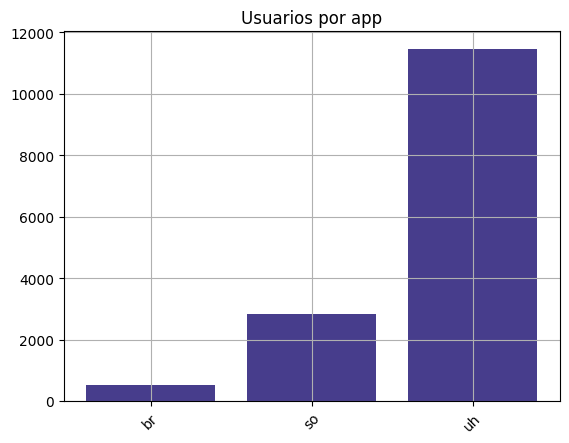

In [32]:
temp = df.groupby("app")[["user_pseudo_id"]].nunique()
plt.bar(temp.index, temp.user_pseudo_id, color =(0.28, 0.24, 0.55))
plt.title("Usuarios por app")
plt.grid()
plt.xticks(rotation=45)
plt.show()

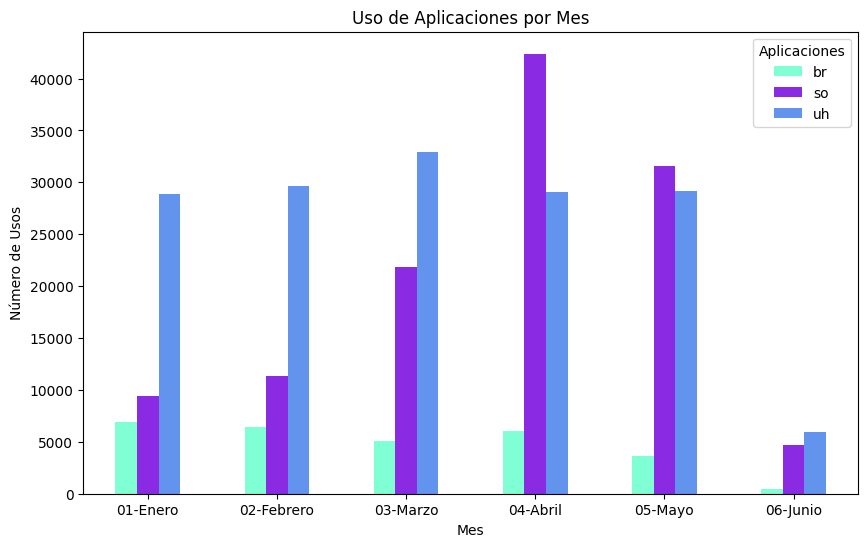

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por Mes y contar el número de veces que se usó cada aplicación en cada Mes
usage_by_month = df.groupby(['event_month', 'app']).size().unstack(fill_value=0)

# Reordenar las columnas para tener el mismo orden en el gráfico
app_order = ['br', 'so', 'uh']
usage_by_month = usage_by_month[app_order]
colores =[(0.5, 1, 0.83), (0.54, 0.17, 0.89),(0.39, 0.58, 0.93)]
# Crear el gráfico de barras
usage_by_month.plot(kind='bar', figsize=(10, 6), color = colores)
plt.title('Uso de Aplicaciones por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Usos')
plt.xticks(rotation=0)
plt.legend(title='Aplicaciones', loc='upper right')
plt.show()

### **Distribution of events by User**

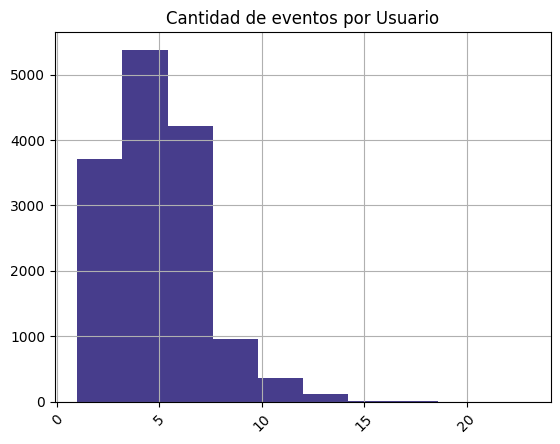

In [34]:
temp = df.groupby("user_pseudo_id")[["event_name"]].nunique()
plt.hist(temp, bins=10,color =(0.28, 0.24, 0.55) )
plt.title("Cantidad de eventos por Usuario")
plt.grid()
plt.xticks(rotation=45)
plt.show()

### **Distribution of events**

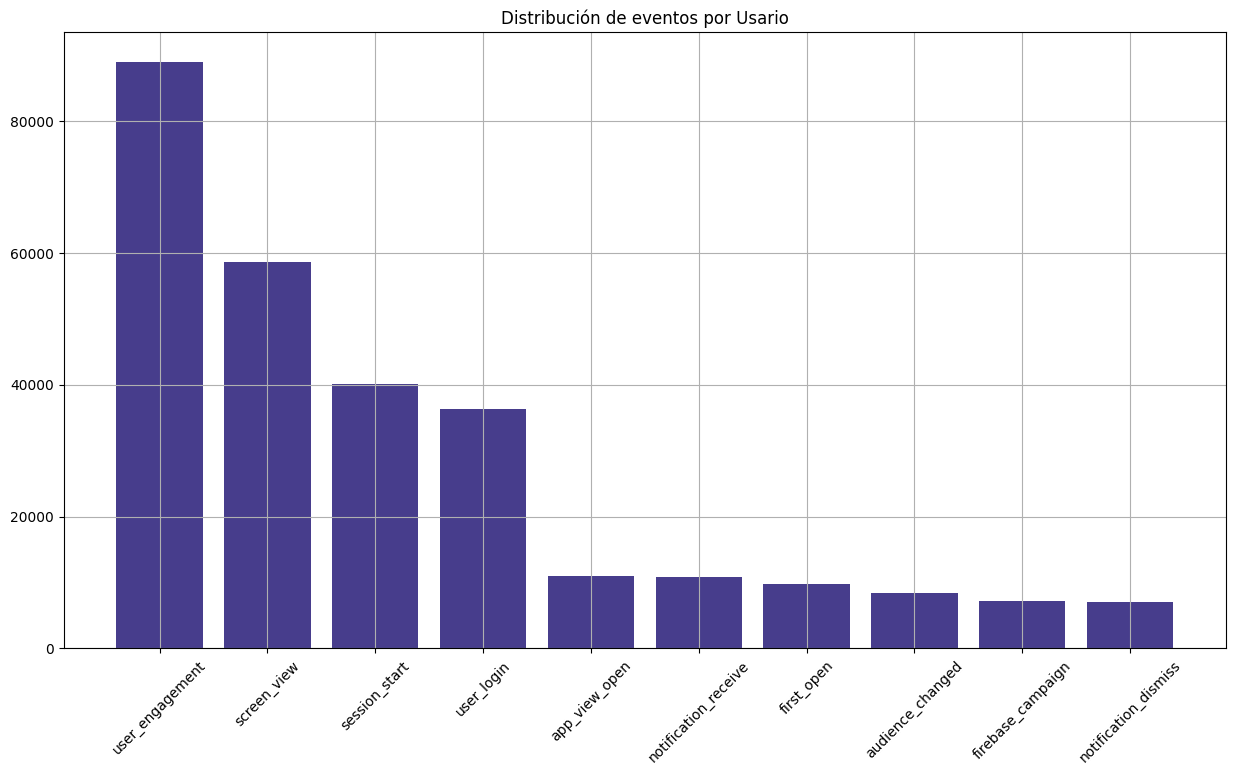

In [35]:
temp = df.groupby("event_name")[["user_pseudo_id"]].count().sort_values(by="user_pseudo_id", ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.bar(temp.index, temp.user_pseudo_id, color =(0.28, 0.24, 0.55))
plt.title("Distribución de eventos por Usario")
plt.grid()
plt.xticks(rotation=45)
plt.show()

### **Distribution by Brand**

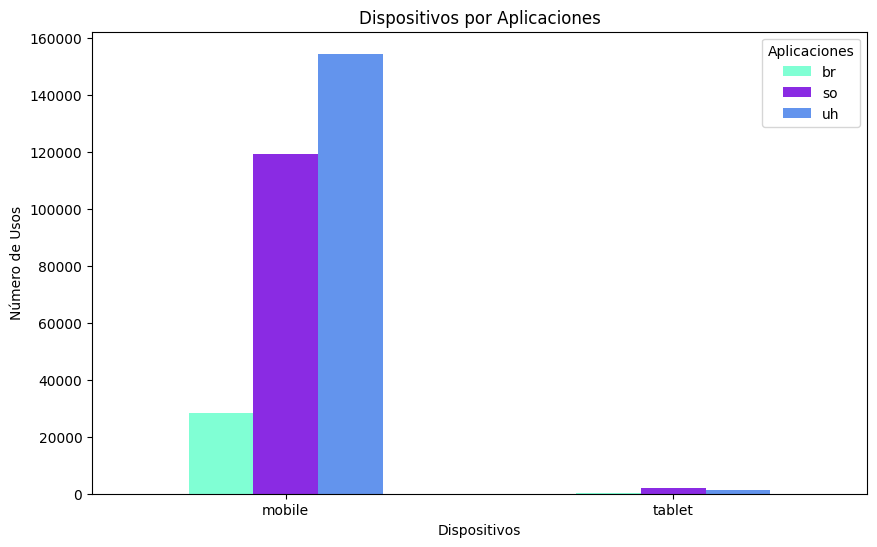

In [36]:
# Agrupar por dispositivo y contar el número de veces que se usó cada aplicación en cada Mes
usage_by_dispo = df.groupby(['device_type', 'app']).size().unstack(fill_value=0)

# Reordenar las columnas para tener el mismo orden en el gráfico
app_order = ['br', 'so', 'uh']
usage_by_dispo = usage_by_dispo[app_order]
colores =[(0.5, 1, 0.83), (0.54, 0.17, 0.89),(0.39, 0.58, 0.93)]
# Crear el gráfico de barras
usage_by_dispo.plot(kind='bar', figsize=(10, 6), color = colores)
plt.title('Dispositivos por Aplicaciones')
plt.xlabel('Dispositivos')
plt.ylabel('Número de Usos')
plt.xticks(rotation=0)
plt.legend(title='Aplicaciones', loc='upper right')
plt.show()

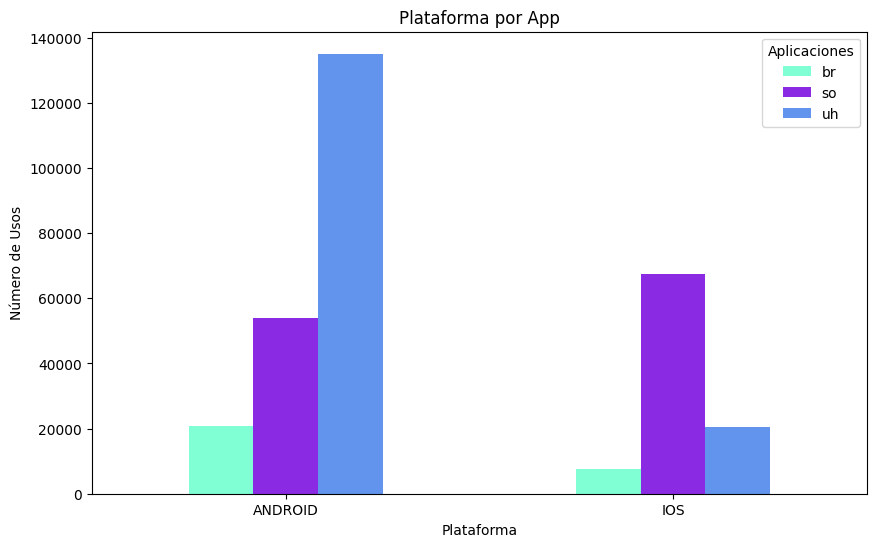

In [37]:
# Agrupar por dispositivo y contar el número de veces que se usó cada aplicación en cada Mes
usage_by_plat = df.groupby(['platform', 'app']).size().unstack(fill_value=0)

# Reordenar las columnas para tener el mismo orden en el gráfico
app_order = ['br', 'so', 'uh']
usage_by_plat = usage_by_plat[app_order]
colores =[(0.5, 1, 0.83), (0.54, 0.17, 0.89),(0.39, 0.58, 0.93)]
# Crear el gráfico de barras
usage_by_plat.plot(kind='bar', figsize=(10, 6), color = colores)
plt.title('Plataforma por App')
plt.xlabel('Plataforma')
plt.ylabel('Número de Usos')
plt.xticks(rotation=0)
plt.legend(title='Aplicaciones', loc='upper right')
plt.show()

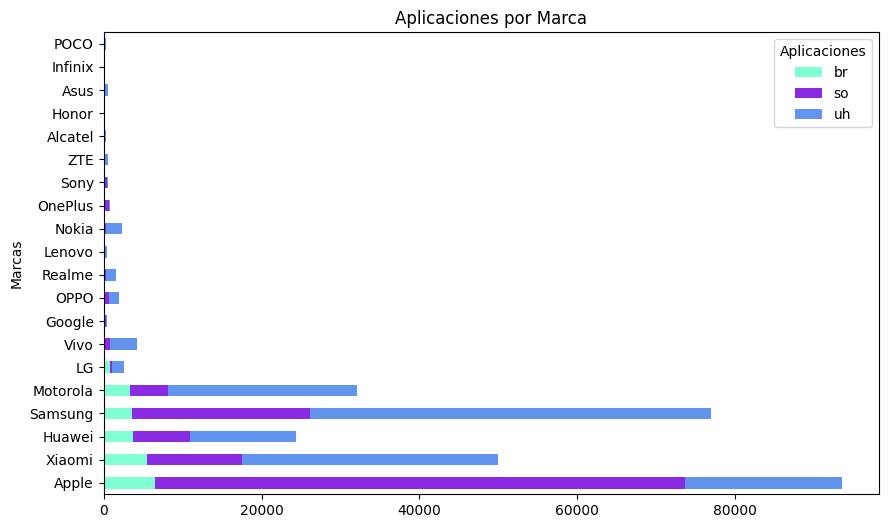

In [39]:
# Contar el número de veces que cada aplicación aparece para cada marca
app_counts = df.groupby(['brand', 'app']).size().unstack(fill_value=0)
apcountfilt = app_counts.sort_values(by=["br","so","uh"], ascending=False)
# Crear un gráfico apilado horizontal
colores =[(0.5, 1, 0.83), (0.54, 0.17, 0.89),(0.39, 0.58, 0.93)]
ax = apcountfilt.head(20).plot(kind='barh', stacked=True, figsize=(10, 6), color = colores)
plt.title('Aplicaciones por Marca')
plt.ylabel('Marcas')
plt.legend(title='Aplicaciones')
plt.show()


In [40]:
import plotly.express as px
mapa = px.data.gapminder().query("year==2007")

In [41]:
mapa["country"] = [i.lower() for i in mapa["country"]]

In [42]:
mapa.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


In [44]:
df = df.merge(mapa, on="country", how="left")

In [45]:
temp = df.groupby(["country","iso_alpha"])[["user_pseudo_id"]].nunique().reset_index()

In [46]:
temp = temp.sort_values(by="user_pseudo_id", ascending=False)
temp.head()

,country,iso_alpha,user_pseudo_id
9,colombia,COL,14029
49,united states,USA,250
37,peru,PER,118
50,uruguay,URY,61
29,mexico,MEX,60


In [47]:
temp["user_pseudo_id"] = np.log(temp["user_pseudo_id"])
temp

,country,iso_alpha,user_pseudo_id
9,colombia,COL,9.548882
49,united states,USA,5.521461
37,peru,PER,4.770685
50,uruguay,URY,4.110874
29,mexico,MEX,4.094345
43,spain,ESP,4.060443
51,venezuela,VEN,3.931826
13,ecuador,ECU,3.737670
10,costa rica,CRI,3.332205
1,argentina,ARG,3.044522


In [48]:
fig = px.scatter_geo(temp, locations="iso_alpha", color="country",
                     hover_name="country", size="user_pseudo_id",
                  projection=   "natural earth",
                  )
fig.show()

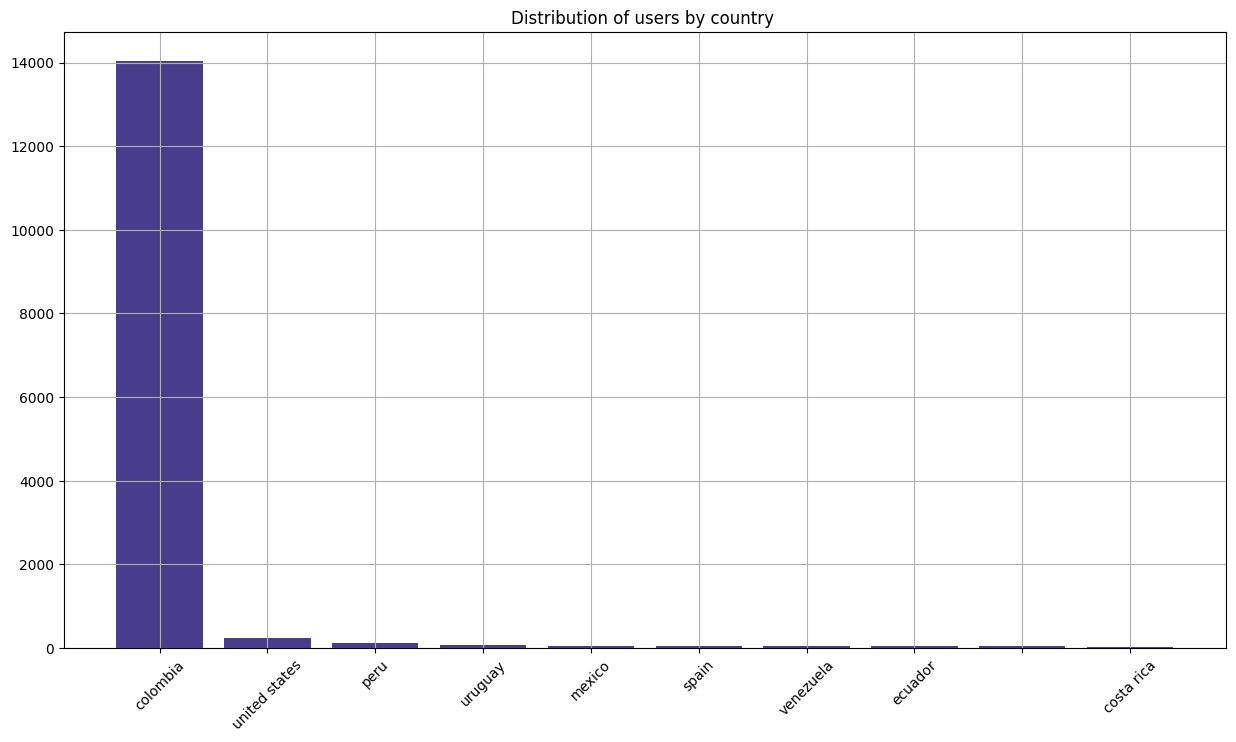

In [49]:
temp = df.groupby("country")[["user_pseudo_id"]].nunique().sort_values("user_pseudo_id",ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.bar(temp.index, temp.user_pseudo_id, color =(0.28, 0.24, 0.55))
plt.title("Distribution of users by country ")
plt.grid()
plt.xticks(rotation=45)
plt.show()